this notebook checks `thesis_v2.data.prepared.yuanyuan_8k.get_data_per_trial`

In [1]:
import numpy as np

from thesis_v2.data.prepared.yuanyuan_8k import (
    get_data_per_trial,
    get_data,
    get_neural_data_per_trial,
    get_indices,
    images as get_images
)

from thesis_v2.spike_data_processing.yuanyuan_8k import config_8k, io_8k

In [2]:
def test_trivial():
    # trivial case.
    datasets = get_data(
        'a', 200, 50, ('042318', '043018', '051018'), scale=0.5,
        seed='legacy'
    )
    datasets_per_trial = get_data_per_trial(
        'a', 200, 50, ('042318', '043018', '051018'), scale=0.5,
        seed='legacy'
    )
    
    assert len(datasets) == len(datasets_per_trial) == 6
    for idx, (d, d_per_trial) in enumerate(zip(datasets, datasets_per_trial)):
        print(d.shape, d_per_trial.shape)
        assert d_per_trial.shape == (6,) + d.shape
    
        if idx % 2 == 0:
            for z in d_per_trial:
                assert np.array_equal(z, d)
        else:
            d_recompute = d_per_trial.mean(axis=0)
            assert np.allclose(d_recompute, d)

In [3]:
test_trivial()

(5120, 1, 50, 50) (6, 5120, 1, 50, 50)
(5120, 79) (6, 5120, 79)
(1280, 1, 50, 50) (6, 1280, 1, 50, 50)
(1280, 79) (6, 1280, 79)
(1600, 1, 50, 50) (6, 1600, 1, 50, 50)
(1600, 79) (6, 1600, 79)


In [4]:
def test_last_frame_one(k):
    # trivial case.
    datasets = get_data(
        'a', 200, 50, ('042318', '043018', '051018'), scale=0.5,
        seed='legacy'
    )
    datasets_per_trial = get_data_per_trial(
        'a', 200, 50, ('042318', '043018', '051018'), scale=0.5,
        seed='legacy', previous_k_frames=k
    )
    
    assert len(datasets) == len(datasets_per_trial) == 6
    for idx, (d, d_per_trial) in enumerate(zip(datasets, datasets_per_trial)):
        print(d.shape, d_per_trial.shape)
        
        if idx % 2 == 0:
            assert d.shape[1] == 1
            assert d_per_trial.shape == (6,) + (d.shape[0],) + (k+1,) + d.shape[2:]
        else:
            d_per_trial.shape == (6,) + d.shape
    
        if idx % 2 == 0:
            for z in d_per_trial:
                print(z.shape, d.shape)
                assert np.array_equal(z[:,-1:], d)
        else:
            d_recompute = d_per_trial.mean(axis=0)
            assert np.allclose(d_recompute, d)
            
def test_last_frame():
    for k in range(1, 8):
        test_last_frame_one(k)
        
test_last_frame()

(5120, 1, 50, 50) (6, 5120, 2, 50, 50)
(5120, 2, 50, 50) (5120, 1, 50, 50)
(5120, 2, 50, 50) (5120, 1, 50, 50)
(5120, 2, 50, 50) (5120, 1, 50, 50)
(5120, 2, 50, 50) (5120, 1, 50, 50)
(5120, 2, 50, 50) (5120, 1, 50, 50)
(5120, 2, 50, 50) (5120, 1, 50, 50)
(5120, 79) (6, 5120, 79)
(1280, 1, 50, 50) (6, 1280, 2, 50, 50)
(1280, 2, 50, 50) (1280, 1, 50, 50)
(1280, 2, 50, 50) (1280, 1, 50, 50)
(1280, 2, 50, 50) (1280, 1, 50, 50)
(1280, 2, 50, 50) (1280, 1, 50, 50)
(1280, 2, 50, 50) (1280, 1, 50, 50)
(1280, 2, 50, 50) (1280, 1, 50, 50)
(1280, 79) (6, 1280, 79)
(1600, 1, 50, 50) (6, 1600, 2, 50, 50)
(1600, 2, 50, 50) (1600, 1, 50, 50)
(1600, 2, 50, 50) (1600, 1, 50, 50)
(1600, 2, 50, 50) (1600, 1, 50, 50)
(1600, 2, 50, 50) (1600, 1, 50, 50)
(1600, 2, 50, 50) (1600, 1, 50, 50)
(1600, 2, 50, 50) (1600, 1, 50, 50)
(1600, 79) (6, 1600, 79)
(5120, 1, 50, 50) (6, 5120, 3, 50, 50)
(5120, 3, 50, 50) (5120, 1, 50, 50)
(5120, 3, 50, 50) (5120, 1, 50, 50)
(5120, 3, 50, 50) (5120, 1, 50, 50)
(5120, 3, 50,

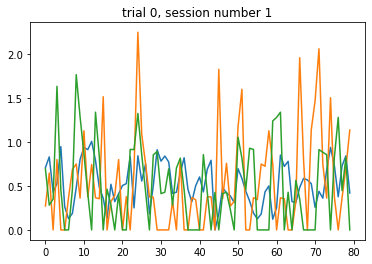

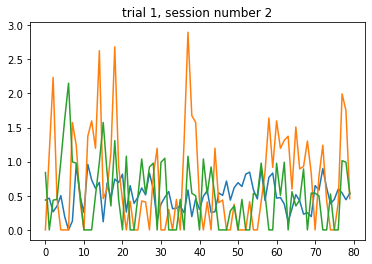

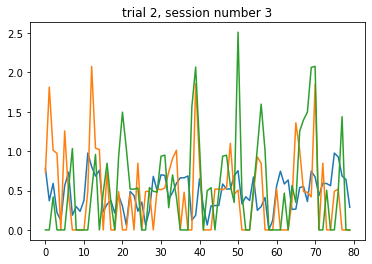

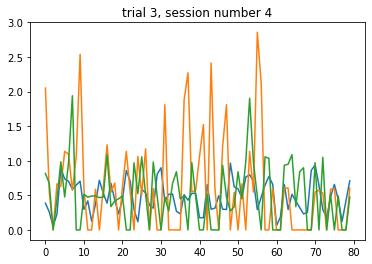

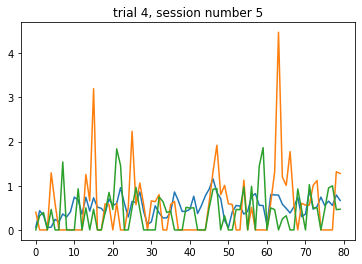

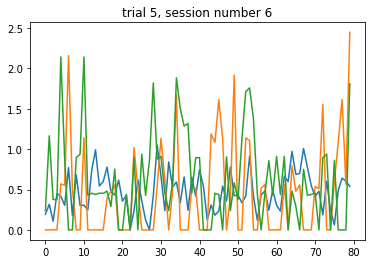

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_per_sequence():
    neural_data_per_trial = get_neural_data_per_trial(('042318', '043018', '051018'), 0.5, transpose_idx=(0, 2, 1))
    record_paras = io_8k.load_spike_count_and_meta_data('042318', load_spike=False)['record_paras']
    para_file_mapping = config_8k.para_file_mapping_dict['042318']
    for idx_trial, param_id in enumerate(para_file_mapping):
        # get the order of images in this one.
        img_original_order = record_paras[param_id, 0][0, 1].ravel() - 1
        # should be 8k x 79
        neural_resp_all_8k_this_trial = neural_data_per_trial[idx_trial,img_original_order]
        assert neural_resp_all_8k_this_trial.shape == (8000, 79)
        assert np.array_equal(neural_resp_all_8k_this_trial[np.argsort(img_original_order)],
                              neural_data_per_trial[idx_trial])
    
        # then plot first 5 sequences (80 frames)
        plt.close('all')
        plt.plot(neural_resp_all_8k_this_trial[:80, 3:6])
        plt.title(f'trial {idx_trial}, session number {param_id}')
        plt.show()

        # TODO: verification to do.
        
# as Professor Lee said, you cannot see typical rise and fall between adjacent movies (16-frame seqeunces)
plot_per_sequence()

In [6]:


def test_all_frames_one(k):
    datasets_per_trial = get_data_per_trial(
        'a', 200, 50, ('042318', '043018', '051018'), scale=0.5,
        seed='legacy', previous_k_frames=k
    )
    
    x_all = get_images('a', 200, 50, read_only=True)
    assert x_all.shape == (8000, 1, 50, 50)
    indices = get_indices('a', 'legacy')
    
    neural_data_per_trial = get_neural_data_per_trial(('042318', '043018', '051018'), 0.5, transpose_idx=(0, 2, 1))
    record_paras = io_8k.load_spike_count_and_meta_data('042318', load_spike=False)['record_paras']
    para_file_mapping = config_8k.para_file_mapping_dict['042318']
    
    # construct.
    train_all = []
    val_all = []
    test_all = []
    for idx_trial, param_id in enumerate(para_file_mapping):
        # get the order of images in this one.
        img_original_order = record_paras[param_id, 0][0, 1].ravel() - 1
        img_original_order_list = img_original_order.tolist()
        
        # construct images.
        images_all_this_trial = np.full((8000, k+1, 50, 50), dtype=x_all.dtype, fill_value=121.0)
        images_all_this_trial[:, -1] = x_all[:, 0]
        for i_image in range(8000):
            location = img_original_order_list.index(i_image)
            for i_fill in  range(min(k,location%16)):
                images_all_this_trial[i_image, -(2+i_fill)] = x_all[img_original_order_list[location-(i_fill+1)], 0]
        train_all.append(images_all_this_trial[indices[0]])
        val_all.append(images_all_this_trial[indices[1]])
        test_all.append(images_all_this_trial[indices[2]])
        
    train_all = np.asarray(train_all)
    val_all = np.asarray(val_all)
    test_all = np.asarray(test_all)
    
    assert np.array_equal(datasets_per_trial[0], train_all)
    assert np.array_equal(datasets_per_trial[2], val_all)
    assert np.array_equal(datasets_per_trial[4], test_all)
    
    assert np.array_equal(datasets_per_trial[1], neural_data_per_trial[:, indices[0]])
    assert np.array_equal(datasets_per_trial[3], neural_data_per_trial[:, indices[1]])
    assert np.array_equal(datasets_per_trial[5], neural_data_per_trial[:, indices[2]])
        
            
def test_all_frames():
    for k in range(1, 8):
        print(k)
        test_all_frames_one(k)
        
test_all_frames()

1
2
3
4
5
6
7
